## PCA and regression error on diamonds data

The Kaggle diamonds data set looks like a good candidate for dimensionality reduction because we know that many of the diamond features are correlated (such as the x,y,z dimensions, and number of carats).

Let's see how many principal components are needed to obtain a high explained variance ratio.  Also, let's see how the number of principal components relates to test error if we use the diamonds data for a regression problem.

### Instructions:
- there are 10 problems for you to solve
- replace YOUR CODE HERE with your own code
- do not make any other changes to the code (although you can put your name beneath the title if you want)

In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
np.random.seed(0)

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/diamonds.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [68]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [69]:
# convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Good       53940 non-null  bool   
 8   cut_Ideal      53940 non-null  bool   
 9   cut_Premium    53940 non-null  bool   
 10  cut_Very Good  53940 non-null  bool   
 11  color_E        53940 non-null  bool   
 12  color_F        53940 non-null  bool   
 13  color_G        53940 non-null  bool   
 14  color_H        53940 non-null  bool   
 15  color_I        53940 non-null  bool   
 16  color_J        53940 non-null  bool   
 17  clarity_IF     53940 non-null  bool   
 18  clarit

In [70]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


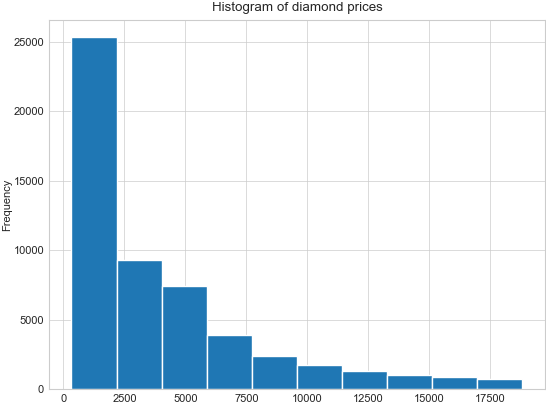

In [71]:
df['price'].plot.hist()
plt.title('Histogram of diamond prices');

### Preprocess data

In [72]:
target = 'price'
predictors = list(df.columns)
predictors.remove(target)

X = df[predictors].values
# X = StandardScaler().fit_transform(df[predictors].values)
y = df[target].values

print(predictors)
print(X.shape)

['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
(53940, 23)


### Apply PCA

#### Problem 1

Apply PCA to X.  Compute the cumulative sum of the explained variance ratio for the number of principal components.  Note the 'explained_variance_ratio_' attribute of a PCA object.

In [73]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [74]:
print(np.round(cumsum, decimals=3))

[0.446 0.688 0.83  0.849 0.867 0.885 0.902 0.917 0.931 0.943 0.955 0.964
 0.972 0.98  0.985 0.99  0.993 0.996 0.997 0.999 0.999 1.    1.   ]


We are interested in the number of components needed to reach a value of explained variance ratio close to one, and also whether there is a clear elbow in the curve.

#### Problem 2

Plot the cumulative sum as a function of the number of principal components.

Use a bar plot or a line plot, whichever you think is clearer.

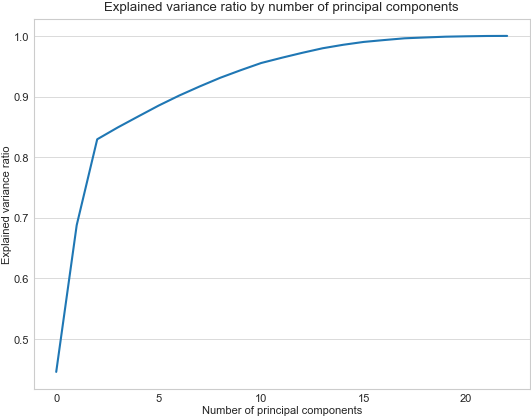

In [75]:
plt.plot(np.arange(len(cumsum)), cumsum)
plt.title('Explained variance ratio by number of principal components')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio');

### Reduce the data as needed to achieve at least 0.95 explained variance ratio

#### Problem 3

Compute NumPy array X_reduced, which is a PCA-reduced version of X with just enough of the principal components used to reach at least 0.95 explained variance ratio.

In [76]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [77]:
print('Number of principal components needed for 0.95 explained variance ratio: ', X_reduced.shape[1])

Number of principal components needed for 0.95 explained variance ratio:  11


### Predict price with linear regression; full data set.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Problem 4

Use linear regression on the full data set. Compute RMSE and R^2 statistic using the test set.

In [79]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
rmse = np.sqrt(((y_predict - y_test)**2).mean())

In [80]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 1122.1
R squared: 0.921


### Predict price with linear regression; reduced data set.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

#### Problem 5

Use linear regression on the reduced data set. Compute RMSE and R^2 on the reduced test set.

In [82]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
rmse = np.sqrt(((y_predict - y_test)**2).mean())

We see a significant increase in RMSE when using the reduced data.

In [83]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 1778.1
R squared: 0.801


### Plot RMSE as a function of the number of principal components

PCA is an unsupervised learning method: it does not reduce dimensionality in a way that takes into account what we want to do with the data.
Let's see how test error with linear regression changes as a function of the number of principal components that are used.

#### Problem 6

Compute two lists (or arrays):
- **num_components**, which will contain the numbers from 1 to the number of columns in X
- **rmses**, which will contain the cross-validated RMSE for the corresponding value in num_components.

For example, the first value in num_components will be 1, and the first value in rmse will be the CV RMSE for the predictions of linear regression when trained on the first principal component.

I imagine you will write a loop.

DO NOT use PCA to fit or transform **within** the loop -- it does not need to be done in the loop and will slow things down a lot.

In [84]:
regr = LinearRegression()
n = X.shape[1]

# for splitting the data
pca = PCA()
X_reduced = pca.fit_transform(X)
    
rmses = []
num_components = np.arange(n) + 1
for i in num_components:
    rmse = -cross_val_score(regr, X_reduced[:, :i], y, scoring='neg_root_mean_squared_error').mean()
    rmses.append(rmse)

This plot is interesting.  It shows an elbow but at a different number of principal components than in the plot of explained variance ratio.

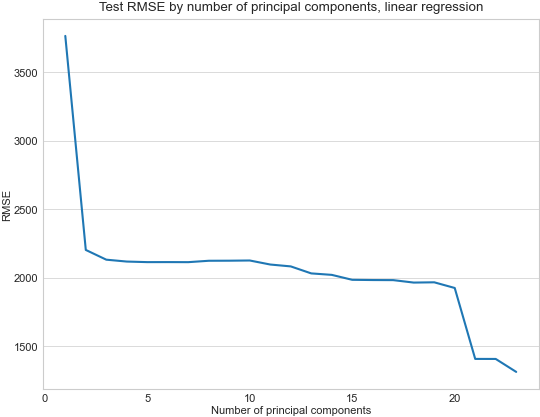

In [85]:
plt.plot(num_components, rmses)
plt.title('Test RMSE by number of principal components, linear regression')
plt.xlabel('Number of principal components')
plt.ylabel('RMSE');

### Use a regression tree to predict price.

Regression trees have some hyperparameters, but let's start with using default values.  

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Problem 7

Create a regression tree.  Use the default hyperparameters.  Train your regressor, make predictions on the test data, and compute test RMSE as variable rmse.

In [87]:
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
rmse = np.sqrt(((y_predict - y_test)**2).mean())

Immediately we get a good RMSE compared to linear regression.



In [88]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 910.5
R squared: 0.948


Let's try again, but with a possibly deeper tree.

#### Problem 8

This is the same as the last problem, but use 10 for max depth.

In [89]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
rmse = np.sqrt(((y_predict - y_test)**2).mean())

The result is about the same as before.

In [90]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

RMSE: 906.1
R squared: 0.949


#### Problem 9

Do the same thing as in Problem 6, but with a regression tree.  Use the default hyperparameter values.

In [91]:
regr = DecisionTreeRegressor()
n = X.shape[1]

# for splitting the data
pca = PCA()
X_reduced = pca.fit_transform(X)
    
rmses = []
num_components = np.arange(n) + 1
for i in num_components:
    rmse = -cross_val_score(regr, X_reduced[:, :i], y, scoring='neg_root_mean_squared_error').mean()
    rmses.append(rmse)

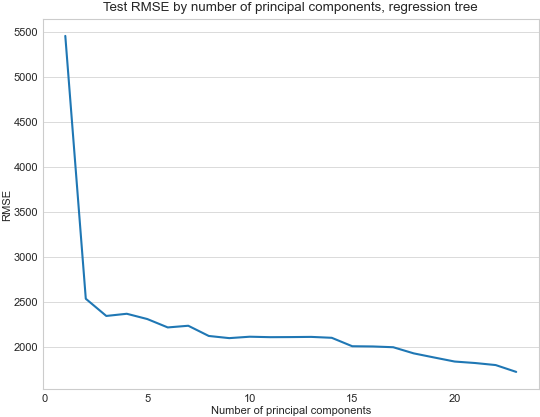

In [92]:
plt.plot(num_components, rmses)
plt.title('Test RMSE by number of principal components, regression tree')
plt.xlabel('Number of principal components')
plt.ylabel('RMSE');

#### Problem 10

For fun, lets look at the diamonds values in 2D using the first two features of the transformed data.

Use the price of the diamond to control the color of each point.

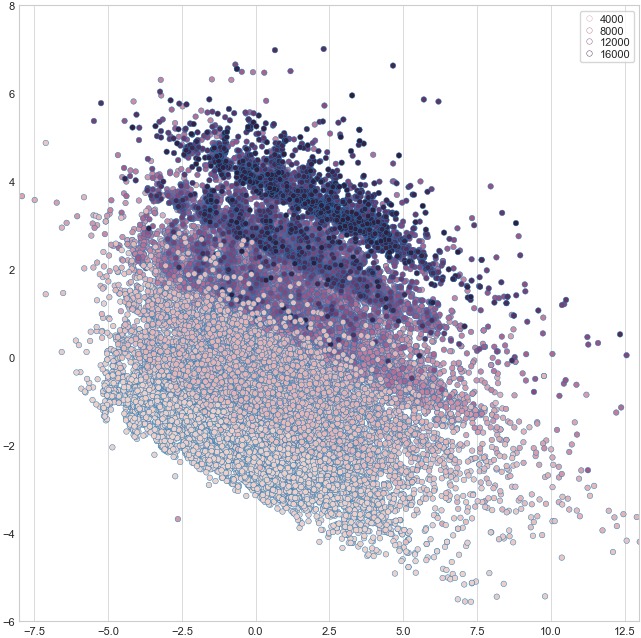

In [93]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y)
plt.axis([-8, 13, -6, 8])
plt.grid();